<a href="https://colab.research.google.com/github/jonathan31101983/Coursera_Capstone/blob/master/Recognition_of_handwrittend_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.3.0
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13 

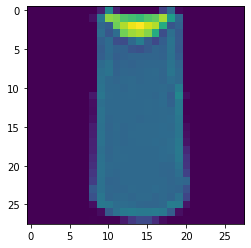

In [48]:
#import tensor flow
import tensorflow as tf
print(tf.__version__)

#loading data from Keras library
mnist=tf.keras.datasets.fashion_mnist

#Loading data get trainin set and test sets
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()

#we want see how look one pictures
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[2])
print(training_images[1])
print(training_labels[1])



In [49]:
#Normalizing the data
training_images=training_images/255
test_images=test_images/255

#Creating a callback that will stop when the trying get 0.60% on the epoch


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()



In [50]:


#create the model

model=tf.keras.Sequential([
                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(128,activation=tf.nn.relu),
                          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

#step 3 define optimizers
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              )



#Step fit the model

model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])




Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4977
Epoch 2/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.3725
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3724


In [51]:
#last step evualate the model

model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4045


0.4045046865940094